<a href="https://colab.research.google.com/github/mathRyan889/Visualiza-o_dados_tecnicas_e_tipos/blob/main/Dados_de_venda_(dataviz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

# 1.2 - Conhecendo os dados
## Situação-problema 1
Uma rede de lojas de departamentos que opera em todo Brasil quer saber como os estados ou sua clientela estão se comportando nas vendas de seus produtos. Para isso, você como cientista de dados precisará analisar os dados que ela disponibilizou em um dataset com os pedidos das suas clientes entre o ano de 2016 e 2019.

Aqui, vamos trabalhar com uma quantidade menor de dados, mas o racional é o mesmo para quantidade de dados maiores.

In [25]:
import pandas as pd

In [26]:
vendas = pd.read_csv('/content/relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'],format="%Y-%m-%d")
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'],format="%Y-%m-%d")
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [27]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

Após visualizarmos de maneira rápida os dados que possuímos, vamos partir para as análises que podemos fazer com esses dados e quais os gráficos de comparação vamos utilizar a fim de apresentar esse tipo de informação.

## Questionamentos

**1- Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?**

**2-Qual é o top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?**

**3-Se separarmos o total de vendas por ano por regiões? O que conseguimos observar em nossos dados?**

**4-Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?**

**5-Qual o total de vendas por trimestre do estado de São Paulo?**

**6-Qual o faturamento por trimestre em cada região?**




# **1.3 - Gráficos de colunas**
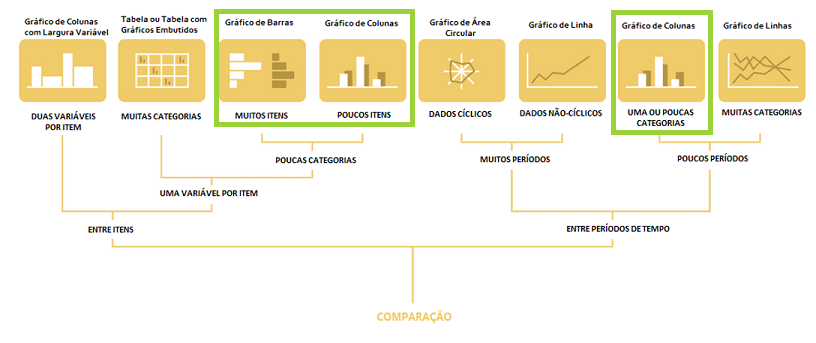

## **Pergunta 1 -** Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?


Tratando os dados para gerar a visualização

In [28]:
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[["data_pedido","vendas"]]

df_vendas_ano["ano"] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels="data_pedido",axis=1,inplace=True)

df_vendas_ano = df_vendas_ano.groupby(["ano"]).sum()

df_vendas_ano.head()

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


# Gerando o Grafico

In [29]:
#importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-30-2120569388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y="vendas", palette=cores)
/tmp/ipython-input-30-2120569388.py:5: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y="vendas", palette=cores)


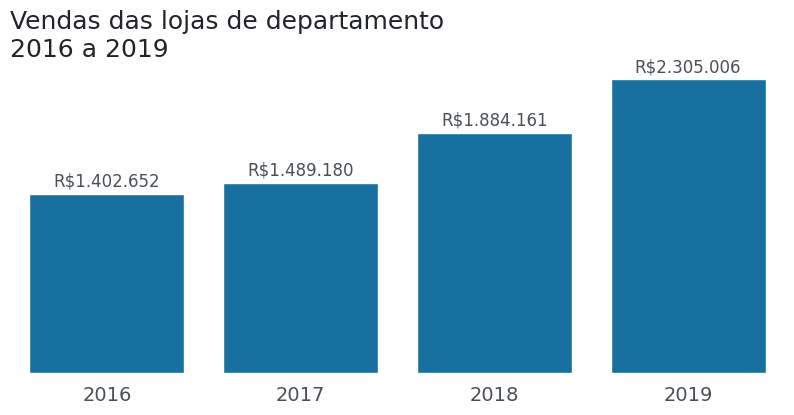

In [30]:
def graficos_vendas(cores: list=[AZUL2]):

  fig,ax = plt.subplots(figsize=(10,4))
  sns.set_theme(style='white')
  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y="vendas", palette=cores)
  ax.set_title("Vendas das lojas de departamento\n2016 a 2019 ", loc = 'left',fontsize=18, color= CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14,labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)
  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano["vendas"]):
    qtd= f"R${valor:,.0f}".replace(",",".")
    offset =1e5
    ax.text(i, valor + offset, qtd, color=CINZA2, fontsize = 12, ha="center", va="center")

  return ax

ax = graficos_vendas()


/tmp/ipython-input-30-2120569388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y="vendas", palette=cores)


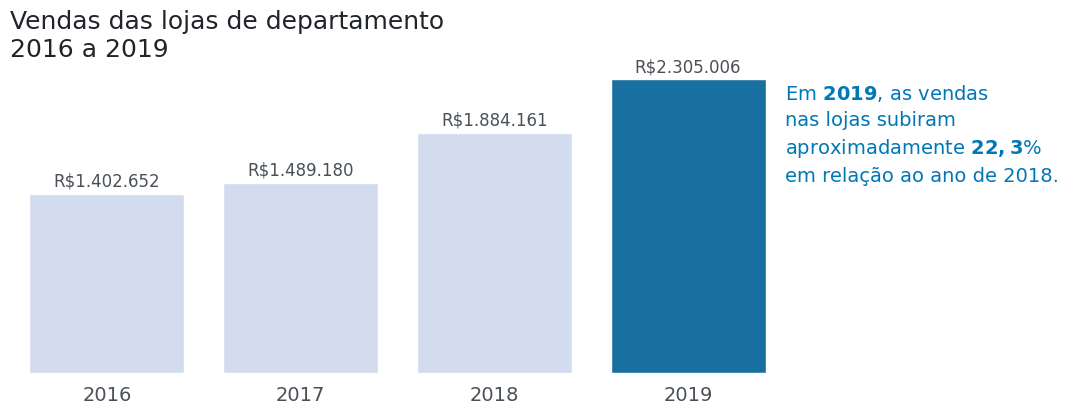

In [31]:
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano,"vendas"] == df_vendas_ano.vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = graficos_vendas(cores)

ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

nome_arquivo = "vendas_lojas_departamento.png"


fig.savefig(nome_arquivo, bbox_inches='tight', dpi=300)

# **Conclusões:**


---


Um gráfico de colunas é ideal para compararmos valores com poucas categorias ou pequenos intervalos de tempo. Utilizamos aqui o recurso de destaque por cor para orientar o nosso público a visualizar o último período em comparação aos outros. Além disso, passamos uma informação em forma de texto apontando a evolução em relação ao ano anterior.

Como sugestão, podemos testar essa técnica também com outros valores em nossa base de dados como, por exemplo, o lucro anual ou o faturamento em vendas pelo estado ou região que você preferir analisar.

# **1.5 - Gráfico de barras**


---


## **Pergunta 2 -** Qual é o top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?
Tratando os dados para gerar a visualização

In [32]:
top_lucro = vendas.copy()
top_lucro = top_lucro[["tipo_produto", "lucro"]]

# Agrupando os dados por tipo_produto, ordenando de maneira crescente pelo lucro e selecionando os 7 primeiros
top_lucro = top_lucro.groupby(["tipo_produto"]).sum().sort_values("lucro", ascending = False)

top_7 = top_lucro[:7]
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


/tmp/ipython-input-33-1708286012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)


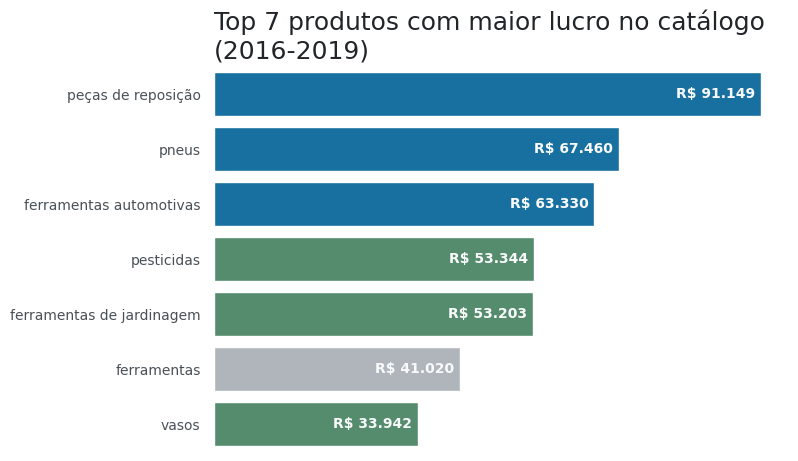

In [33]:

def grafico_top_7():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,5))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style="white")

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Gerando o gráfico de barras
  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)

  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo \n(2016-2019)', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  return ax

ax = grafico_top_7()


In [34]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

A função texto_colorido() é similar a função plt.text(). Ela basicamente recebe:

x e y: as coordenadas da escrita do texto
texto: o texto em formato de string
cores: as cores que vamos utilizar em cada linha numa lista de listas, onde cada item da lista de listas corresponde a cada linha
esp: o espaçamento entre linhas
ax: o eixo da figura onde desenhar o texto
(kw): propriedades da classe Texto que podem ser utilizadas na função
Outra coisa importante para entender são os delimitadores. Aqui esta função usa dois tipos de delimitadores:

|| : para definir a mudança de cores numa mesma linha. No código é definido como um separador de frases
\n : separador de linhas. Apenas a última linha não deve possuir o separador de linhas, pois ocasionaria em erro no código
Os outros métodos são para manipulação dos eixos e definição dos pontos de interesse para espaçamento das linhas e posição do texto.

# **Gerando o texto colorido no gráfico**


---


Continuando, vamos gerar o texto colorido na lateral direita do gráfico. Primeiro, vamos chamar a função de geração do gráfico de barras e depois a função da geração do texto:

/tmp/ipython-input-33-1708286012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)


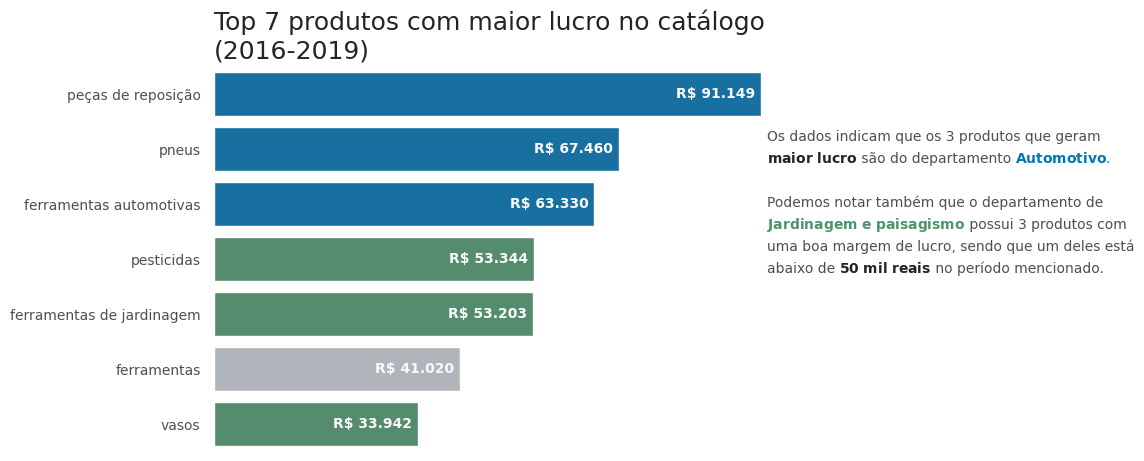

In [35]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

# **Conclusão**


---
Um gráfico de barras é ideal para compararmos valores com muitos itens (acima de 5), principalmente se os itens forem pequenas frases ou palavras. Utilizamos aqui o recurso de divisão de categorias por cor, além do destaque dessas no texto, orientando o público sobre qual dados em específico estamos explorando.

Como sugestão, podemos testar essa técnica também com outros valores em nossa base de dados como, por exemplo, o faturamento em um dado período ou em relação ao departamento e/ou região que você preferir analisar.